# Introduction
This Jupyter Notebook aims to analyze user behavior across different lending protocols, focusing on how users interact with various tokens as collateral and debt. Specifically, we will investigate the looping behavior of users, where assets are borrowed on one protocol and then deposited as collateral in another protocol. This analysis will help us understand the extent and impact of such behaviors on the lending ecosystem.

# Objectives
### Load the Data

- We will load loan data for multiple lending protocols from Google Cloud Storage. The datasets contain detailed information about users, their collateral, and debt across different protocols.
- The data loading process will be implemented flexibly to allow easy switching between data sources (e.g., from cloud storage to a local database).

### Visualize User Behavior
- We will create visualizations to track the behavior of individual users across lending protocols, focusing on specific tokens such as "ETH", "wBTC", "USDC", "DAI", "USDT", "wstETH", "LORDS", "STRK", "UNO", and "ZEND".
- The visualizations will help answer several key questions:
  - How many users have borrowed an asset on one protocol and deposited the asset as collateral in another protocol?
  - How many users have completed a loop, i.e., deposited token X as collateral, borrowed token Y, deposited Y in another protocol, and borrowed X again?
  - What is the total dollar amount of tokens involved in these loops? How much are the deposits multiplied?
  - Which protocols are most subject to looping behavior? How do they compare on a per-token basis?

# Analysis and Insights
The analysis will not only address the predefined questions but also explore additional metrics and hypotheses that may arise during the investigation.
Meaningful outputs and insights will be provided, documenting the findings and their implications for the lending protocols.

# Loading the data

### From local Database

#### Postgres

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Only needed for Jupyter Notebook

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host='your_host',
    user='your_username',
    password='your_password',
    dbname='loans_db'
)

# List of protocols (table names in the PostgreSQL database)
protocols = ["zklend", "nostra_alpha", "nostra_mainnet", "hashstack_v0", "hashstack_v1"]

for protocol in protocols:
    print(f"Processing {protocol}...")
    
    # Query the data from the PostgreSQL database
    query = f"SELECT * FROM {protocol}"
    df = pd.read_sql_query(query, conn)
    
    pd.set_option('display.max_columns', None)  # Display all columns
    pd.set_option('display.max_colwidth', None)  # Display full column width
    pd.set_option('display.width', None)  # Adjust display width

    # Display the first rows
    display(df.head())

# Close the connection
conn.close()


#### MySQL

In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Only needed for Jupyter Notebook

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='your_host',
    user='your_username',
    password='your_password',
    database='loans_db'
)

# List of protocols (table names in the MySQL database)
protocols = ["zklend", "nostra_alpha", "nostra_mainnet", "hashstack_v0", "hashstack_v1"]

for protocol in protocols:
    print(f"Processing {protocol}...")
    
    # Query the data from the MySQL database
    query = f"SELECT * FROM {protocol}"
    df = pd.read_sql_query(query, conn)
    
    pd.set_option('display.max_columns', None)  # Display all columns
    pd.set_option('display.max_colwidth', None)  # Display full column width
    pd.set_option('display.width', None)  # Adjust display width

    # Display the first rows
    display(df.head())

# Close the connection
conn.close()


### From GCS

In [15]:
import pandas as pd
import pyarrow.parquet as pq
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

# URLs of the loans files for all lending protocols
parquet_urls = {
    "zklend": "https://storage.googleapis.com/derisk-persistent-state/zklend_data/loans.parquet",
    "nostra_alpha": "https://storage.googleapis.com/derisk-persistent-state/nostra_alpha_data/loans.parquet",
    "nostra_mainnet": "https://storage.googleapis.com/derisk-persistent-state/nostra_mainnet_data/loans.parquet",
    "hashstack_v0": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v0_data/loans.parquet",
    "hashstack_v1": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v1_data/loans.parquet"
}

dataframes = {}

for protocol,url in parquet_urls.items():
    # Download the file
    response = requests.get(url)
    response.raise_for_status()  # Ensure the request was successful

    # Read the Parquet file into a Pandas DataFrame
    with BytesIO(response.content) as f:
        table = pq.read_table(f)
        df = table.to_pandas()
    
    # Store dataframe in dictionary
    dataframes[protocol] = df

    pd.set_option('display.max_columns', None)  # Display all columns
    pd.set_option('display.max_colwidth', None)  # Display full column width
    pd.set_option('display.width', None)  # Adjust display width


    # Display the first rows
    display(df.head())



,User,Protocol,Collateral (USD),Risk-adjusted collateral (USD),Debt (USD),Health factor,Standardized health factor,Collateral,Debt
0,0x4306021e30f9577351207140f90425b3e9e102ec5a424843d699cd6c9c05307,zkLend,5744.568231,4289.009524,22.162648,193.524234,193.524234,"USDC: 113.3876, USDT: 4610.7524, STRK: 904.5577","USDC: 10.0284, USDT: 10.0302, wstETH: 0.0006"
1,0x30b399e06903676ada3eccd5522e0cca4c4ad0101468c0ac407a56aa1a0ed3c,zkLend,37.671463,30.137170,0.000000,inf,inf,ETH: 0.0126,
2,0x2f006034f567d5c2431bc4104b2cc7a1bf8f004bd00cbbfbf7b656e6e6c443c,zkLend,102.450086,81.960069,0.387499,211.510582,211.510582,"ETH: 0.0311, USDC: 6.5088, USDT: 3.0144",ETH: 0.0005
3,0x43e9ee859c0f85a6d5ab3f7ad26c50b9e9d8a8e10d0d71a3f4200192c6871a2,zkLend,-5.156963,-4.125570,0.000000,inf,inf,,
4,0x22dd5ed1e4d359eca2e772ecefa57e31bb7756772850081dc12217dd03cffbc,zkLend,213.311298,157.651127,0.000000,inf,inf,"wBTC: 0.0018, DAI: 23.1396, USDT: 83.3628",


,User,Protocol,Collateral (USD),Risk-adjusted collateral (USD),Debt (USD),Health factor,Standardized health factor,Collateral,Debt
0,0x6810f5565965ac915feee7d57d3225cd470ce54a40b5b53d69d9f4ed59bd719,Nostra Alpha,5.012320,4.511088,0.000000,inf,inf,USDC: 5.0136,
1,0x1b706b18846667c44fdf2dc302ed90b98c0ae3aa6e041fdbdea1289d0284b03,Nostra Alpha,32.454788,26.051526,0.000000,inf,inf,"ETH: 0.0070, USDC: 0.8772, USDT: 10.6526",
2,0x3def891ad08c209a1fcc67607c55b32e0d18137b00f90bd393b4b85867ad435,Nostra Alpha,14.938994,11.951195,0.000000,inf,inf,ETH: 0.0050,
3,0x42dbc9170cd78224c4d013fd01f2401da0e66f9bba4bb6505224ba93e27a2bb,Nostra Alpha,4.009317,3.407946,1.113672,2.907094,2.907094,"USDC: 2.0055, USDT: 2.0051",USDT: 1.1141
4,0x2d50b82f53cc24f44d562207009f89f60b04ba98bff6deba999b50b964c9dff,Nostra Alpha,4.139529,3.725576,0.498447,5.979490,5.979490,USDC: 4.1406,wBTC: 0.0000


,User,Protocol,Collateral (USD),Risk-adjusted collateral (USD),Debt (USD),Health factor,Standardized health factor,Collateral,Debt
0,0x5295882956890bb9c05e54c1e7efa903a4a21083ebd6a3c175507f74e549574,Nostra Mainnet,1702.601958,1362.208392,0.000000,inf,inf,"ETH: 0.5515, USDC: 2.0574, DAI: 12.5399, USDT: 5.2209, wstETH: 0.0101, STRK: 0.3490",
1,0x2d50b82f53cc24f44d562207009f89f60b04ba98bff6deba999b50b964c9dfe,Nostra Mainnet,0.103021,0.092719,0.000000,inf,inf,USDC: 0.1030,
2,0x1b706b18846667c44fdf2dc302ed90b98c0ae3aa6e041fdbdea1289d0284b03,Nostra Mainnet,1453.043720,1162.434976,0.000000,inf,inf,ETH: 0.4865,
3,0x16e26f25bc7940de9c75347dab436f733c25e6da6e492a1eb74c218cd7d05ae,Nostra Mainnet,10329.173299,8479.192061,1368.895753,5.884475,5.884475,"ETH: 2.5902, USDC: 2159.7961, USDT: 433.6514, STRK: 0.3070",USDT: 1369.3983
4,0x582b266f28c77fc6a37490e3ba13b97406c5d72294939937c423d35c5793533,Nostra Mainnet,0.000000,0.000000,0.000000,inf,inf,,


,User,Protocol,Collateral (USD),Risk-adjusted collateral (USD),Debt (USD),Health factor,Standardized health factor,Collateral,Debt
0,0x5b55db55f5884856860e63f3595b2ec6b2c9555f3f507b4ca728d8e427b7864,Hashstack V0,0.000000,0.000000,0.0,inf,inf,,
1,0x5b55db55f5884856860e63f3595b2ec6b2c9555f3f507b4ca728d8e427b7864,Hashstack V0,14.389145,14.389145,0.0,inf,inf,USDC: 14.3929,
2,0x5b55db55f5884856860e63f3595b2ec6b2c9555f3f507b4ca728d8e427b7864,Hashstack V0,0.000000,0.000000,0.0,inf,inf,,
3,0x1e307316999c4830ada67b495d03246ab205e77853bb117da7b555122a33bc7,Hashstack V0,0.000000,0.000000,0.0,inf,inf,,
4,0x74061d07a0fbd8ffc376dc4f593c69854c51b6c2fe5596d88452e9efdd76864,Hashstack V0,0.000000,0.000000,0.0,inf,inf,,


,User,Protocol,Collateral (USD),Risk-adjusted collateral (USD),Debt (USD),Health factor,Standardized health factor,Collateral,Debt
0,0x251e01d33f75076732f5c7c671d1e6918f3cd0f36a4dedcc35e642297f30d2a,Hashstack V1,12.098501,12.098501,4.498348,2.689543,2.586099,"USDT: 5.0000, JediSwap: WBTC/USDC Pool: 0.0000",USDT: 4.5000
1,0x251e01d33f75076732f5c7c671d1e6918f3cd0f36a4dedcc35e642297f30d2a,Hashstack V1,10.341679,10.341679,7.168104,1.442736,1.387246,"USDT: 3.9997, mySwap: WBTC/USDC Pool: 0.0099",ETH: 0.0024
2,0x14afb3508a365a406cc5dd1578d987a3b15d53df661a1dbd07049b57199e4d1,Hashstack V1,0.000000,0.000000,0.000000,inf,inf,,
3,0x251e01d33f75076732f5c7c671d1e6918f3cd0f36a4dedcc35e642297f30d2a,Hashstack V1,5.998194,5.998194,3.998948,1.499943,1.442253,"USDC: 4.0000, USDT: 2.0000",USDC: 4.0000
4,0x14afb3508a365a406cc5dd1578d987a3b15d53df661a1dbd07049b57199e4d1,Hashstack V1,0.000000,0.000000,0.000000,inf,inf,,


## How many users have borrowed an asset on one protocol and deposited the asset as collateral in another protocol?

### Users by Token

In [19]:
# Tokens to analyze
tokens = ["ETH", "wBTC", "USDC", "DAI", "USDT", "wstETH", "LORDS", "STRK", "UNO", "ZEND"]

# Initialize a dictionary to keep track of borrowed and collateral assets
borrowed_assets = {}
collateral_assets = {}

# Extract and split the collateral and debt information for each protocol
for protocol, df in dataframes.items():
    for token in tokens:
        borrowed_assets.setdefault(token, set()).update(df[df['Debt'].str.contains(token, na=False)]['User'])
        collateral_assets.setdefault(token, set()).update(df[df['Collateral'].str.contains(token, na=False)]['User'])

# Find users who borrowed an asset on one protocol and deposited the same asset as collateral on another protocol
common_users = {}
for token in tokens:
    common_users[token] = borrowed_assets[token].intersection(collateral_assets[token])

# Count unique users for each token
user_counts = {token: len(users) for token, users in common_users.items()}

# Display results
for token, count in user_counts.items():
    print(f"{token}: {count} users have borrowed and deposited the same asset across different protocols.")

ETH: 31218 users have borrowed and deposited the same asset across different protocols.
wBTC: 493 users have borrowed and deposited the same asset across different protocols.
USDC: 18749 users have borrowed and deposited the same asset across different protocols.
DAI: 1886 users have borrowed and deposited the same asset across different protocols.
USDT: 6109 users have borrowed and deposited the same asset across different protocols.
wstETH: 223 users have borrowed and deposited the same asset across different protocols.
LORDS: 4 users have borrowed and deposited the same asset across different protocols.
STRK: 6262 users have borrowed and deposited the same asset across different protocols.
UNO: 0 users have borrowed and deposited the same asset across different protocols.
ZEND: 0 users have borrowed and deposited the same asset across different protocols.


### Visualization Chart

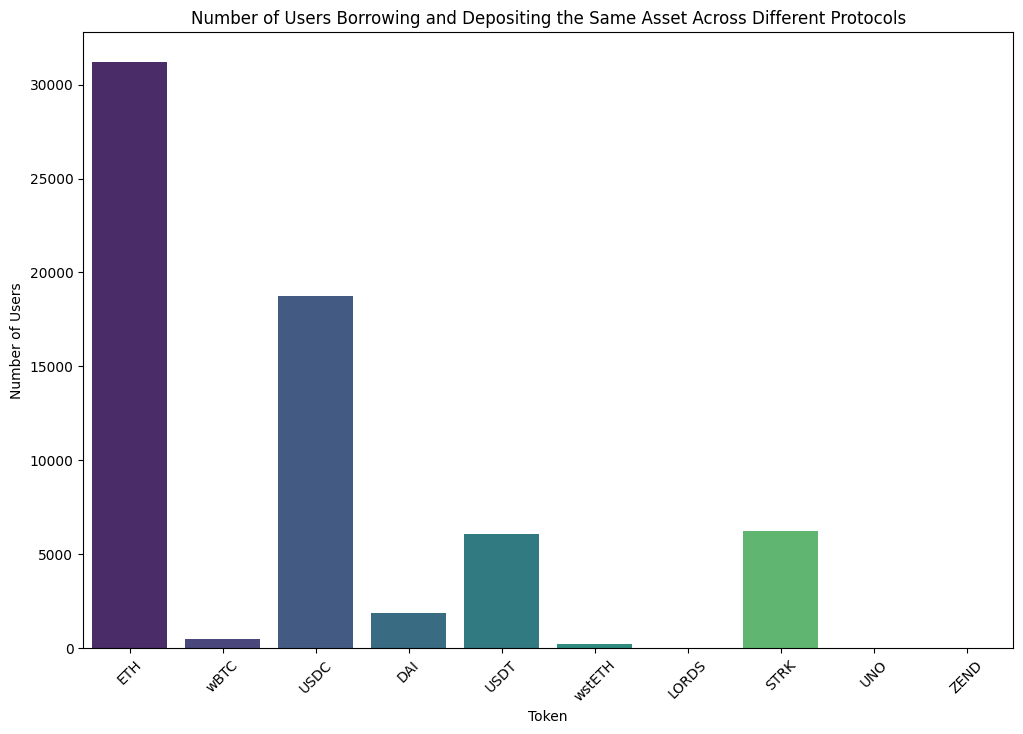

In [20]:
# Convert the results to a DataFrame for plotting
results_df = pd.DataFrame(list(user_counts.items()), columns=['Token', 'User Count'])

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Token', y='User Count', hue='Token', dodge=False, palette='viridis', legend=False)
plt.title('Number of Users Borrowing and Depositing the Same Asset Across Different Protocols')
plt.xlabel('Token')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

### All users accross the all the protocols 

In [22]:
all_users = set()

# Extract and split the collateral and debt information for each protocol
for protocol, df in dataframes.items():
    all_users.update(df['User'])  # Add all users to the set of all users
    for token in tokens:
        borrowed_assets.setdefault(token, set()).update(df[df['Debt'].str.contains(token, na=False)]['User'])
        collateral_assets.setdefault(token, set()).update(df[df['Collateral'].str.contains(token, na=False)]['User'])

# Find users who borrowed an asset on one protocol and deposited the same asset as collateral on another protocol
common_users = {}
for token in tokens:
    common_users[token] = borrowed_assets[token].intersection(collateral_assets[token])

# Count unique users for each token
user_counts = {token: len(users) for token, users in common_users.items()}

# Calculate total users and users involved in borrowing and depositing
total_users = len(all_users)
unique_common_users = set().union(*common_users.values())
total_common_users = len(unique_common_users)

# Print results
print(f"Total number of users: {total_users}")
print(f"Number of users who borrowed and deposited the same asset across different protocols: {total_common_users}")

Total number of users: 1468482
Number of users who borrowed and deposited the same asset across different protocols: 59880


### Visualization Chart

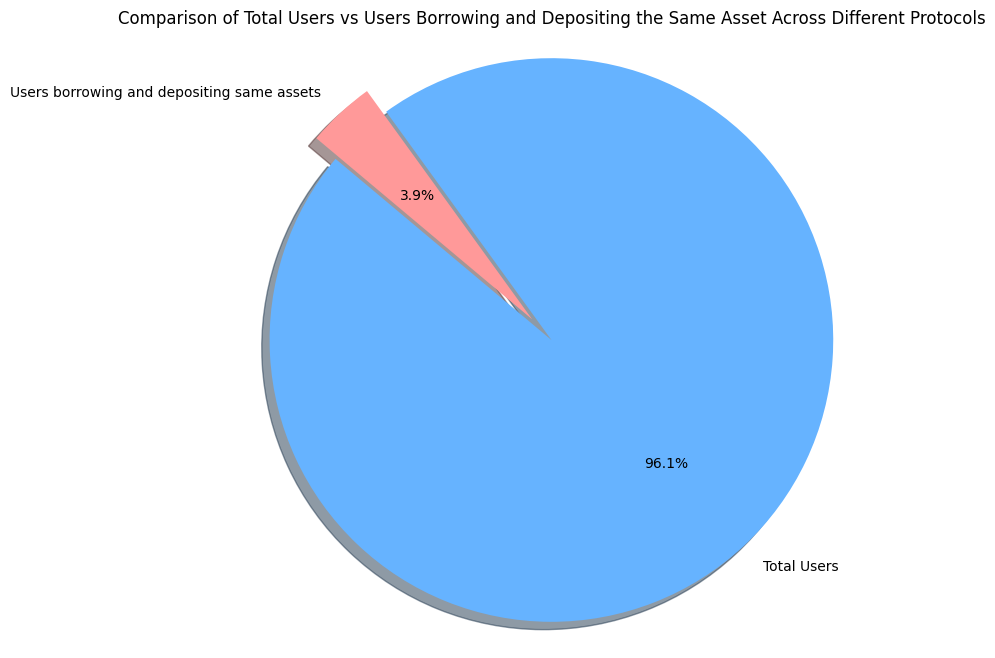

In [26]:
# Plot the results in a pie chart
labels = ['Total Users', 'Users borrowing and depositing same assets']
sizes = [total_users, total_common_users]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the 2nd slice (Borrowing and Depositing users)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Total Users vs Users Borrowing and Depositing the Same Asset Across Different Protocols')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## How many users have completed the loop, i.e. deposited token X as collateral, borrowed token Y, deposited Y in another protocol and borrowed X. The loop can contain more than 2 tokens and more then 2 lending protocols.

Total number of users: 1468482
Number of users who have completed the loop: 0


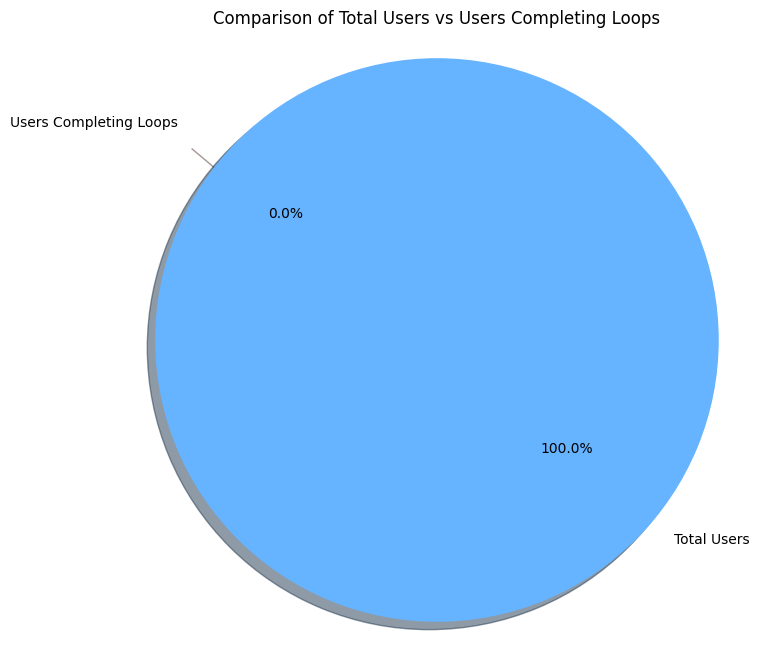

In [32]:
from collections import defaultdict 

# Tokens to analyze
tokens = ["ETH", "wBTC", "USDC", "DAI", "USDT", "wstETH", "LORDS", "STRK", "UNO", "ZEND"]

# Create a graph representation for each user
user_graph = defaultdict(lambda: defaultdict(set))

# Populate the graph with edges
for protocol, df in dataframes.items():
    for _, row in df.iterrows():
        user = row['User']
        protocol = row['Protocol']
        collateral_tokens = row['Collateral'].split(', ')
        debt_tokens = row['Debt'].split(', ')
        
        for col_token in collateral_tokens:
            if ': ' in col_token:
                col_name, col_amount = col_token.split(': ', 1)  # Split only at the first occurrence
                if col_name in tokens:
                    user_graph[user][(protocol, col_name, 'collateral')].add(col_amount)
        
        for debt_token in debt_tokens:
            if ': ' in debt_token:
                debt_name, debt_amount = debt_token.split(': ', 1)  # Split only at the first occurrence
                if debt_name in tokens:
                    user_graph[user][(protocol, debt_name, 'debt')].add(debt_amount)

# Function to find loops in the user's action graph
def find_loops(user_graph):
    loops = set()
    
    for user in list(user_graph.keys()):
        actions = user_graph[user]
        for start_action in list(actions.keys()):
            stack = [(start_action, [start_action])]
            visited = set()

            while stack:
                current_action, path = stack.pop()
                if current_action in visited:
                    continue
                visited.add(current_action)

                for neighbor in actions[current_action]:
                    neighbor_action = (neighbor[0], neighbor[1], 'debt' if current_action[2] == 'collateral' else 'collateral')
                    if neighbor_action == start_action and len(path) > 1:
                        loops.add(tuple(path))
                        continue
                    if neighbor_action not in visited:
                        stack.append((neighbor_action, path + [neighbor_action]))

    return loops

# Find loops in the graph
loops = find_loops(user_graph)
looping_users = set(loop[0][0] for loop in loops)

# Count the number of users who have completed loops
num_looping_users = len(looping_users)

# Calculate total users
total_users = len(set(user for df in dataframes.values() for user in df['User']))

# Print the results
print(f"Total number of users: {total_users}")
print(f"Number of users who have completed the loop: {num_looping_users}")

# Plot the results in a pie chart
labels = ['Total Users', 'Users Completing Loops']
sizes = [total_users, num_looping_users]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the 2nd slice (Completing Loop users)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Total Users vs Users Completing Loops')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Processing zklend...
Processing nostra_alpha...
Processing nostra_mainnet...
Processing hashstack_v0...
Processing hashstack_v1...
Total number of users: 1468482
Number of users who have completed the loop: 0


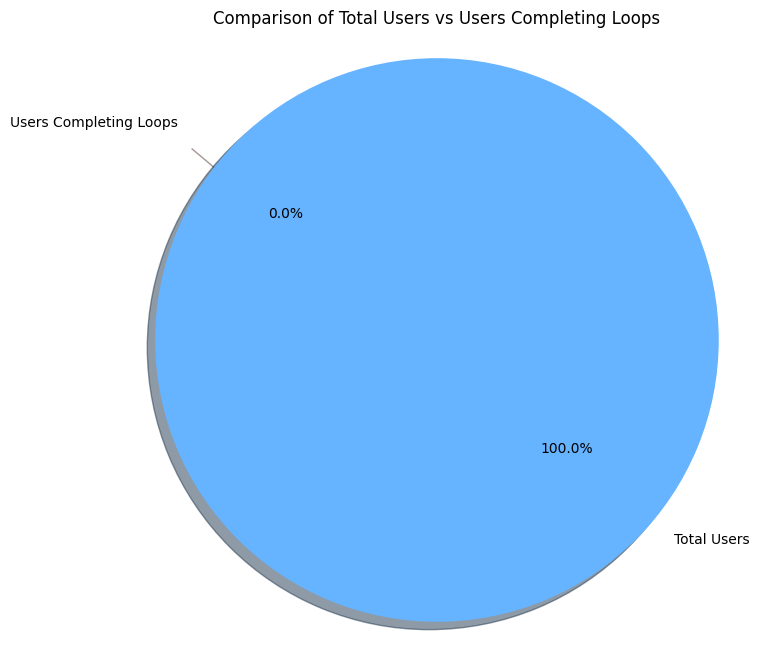

In [34]:
import pandas as pd
import pyarrow.parquet as pq
import requests
from io import BytesIO
from collections import defaultdict
import matplotlib.pyplot as plt

# URLs of the loans files for all lending protocols
parquet_urls = {
    "zklend": "https://storage.googleapis.com/derisk-persistent-state/zklend_data/loans.parquet",
    "nostra_alpha": "https://storage.googleapis.com/derisk-persistent-state/nostra_alpha_data/loans.parquet",
    "nostra_mainnet": "https://storage.googleapis.com/derisk-persistent-state/nostra_mainnet_data/loans.parquet",
    "hashstack_v0": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v0_data/loans.parquet",
    "hashstack_v1": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v1_data/loans.parquet"
}

# Dictionary to store the DataFrames
dataframes = {}

# Loop through each URL in the dictionary
for protocol, url in parquet_urls.items():
    print(f"Processing {protocol}...")
    
    # Download the file
    response = requests.get(url)
    response.raise_for_status()  # Ensure the request was successful

    # Read the Parquet file into a Pandas DataFrame
    with BytesIO(response.content) as f:
        table = pq.read_table(f)
        df = table.to_pandas()
    
    # Store the DataFrame in the dictionary
    dataframes[protocol] = df

# Tokens to analyze
tokens = ["ETH", "wBTC", "USDC", "DAI", "USDT", "wstETH", "LORDS", "STRK", "UNO", "ZEND"]

# Create a graph representation for each user
user_graph = defaultdict(lambda: defaultdict(set))

# Populate the graph with edges
for protocol, df in dataframes.items():
    for _, row in df.iterrows():
        user = row['User']
        protocol = row['Protocol']
        collateral_tokens = row['Collateral'].split(', ')
        debt_tokens = row['Debt'].split(', ')
        
        for col_token in collateral_tokens:
            if ': ' in col_token:
                col_name, col_amount = col_token.split(': ', 1)  # Split only at the first occurrence
                if col_name in tokens:
                    user_graph[user][(protocol, col_name, 'collateral')].add(float(col_amount))
        
        for debt_token in debt_tokens:
            if ': ' in debt_token:
                debt_name, debt_amount = debt_token.split(': ', 1)  # Split only at the first occurrence
                if debt_name in tokens:
                    user_graph[user][(protocol, debt_name, 'debt')].add(float(debt_amount))

# Function to find loops in the user's action graph
def find_loops(user_graph):
    loops = set()
    
    def dfs(current_action, start_action, path, visited, user_actions):
        if current_action in visited:
            return
        visited.add(current_action)

        for next_action in user_actions:
            if next_action[2] == 'collateral' and current_action[2] == 'debt' and next_action[1] == current_action[1]:
                if next_action == start_action and len(path) > 1:
                    loops.add(tuple(path))
                else:
                    dfs(next_action, start_action, path + [next_action], visited.copy(), user_actions)
    
    for user in list(user_graph.keys()):
        user_actions = list(user_graph[user].keys())
        for action in user_actions:
            dfs(action, action, [action], set(), user_actions)
    
    return loops

# Find loops in the graph
loops = find_loops(user_graph)
looping_users = set(loop[0][0] for loop in loops)

# Count the number of users who have completed loops
num_looping_users = len(looping_users)

# Calculate total users
total_users = len(set(user for df in dataframes.values() for user in df['User']))

# Print the results
print(f"Total number of users: {total_users}")
print(f"Number of users who have completed the loop: {num_looping_users}")

# Plot the results in a pie chart
labels = ['Total Users', 'Users Completing Loops']
sizes = [total_users, num_looping_users]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the 2nd slice (Completing Loop users)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Total Users vs Users Completing Loops')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [36]:
import pandas as pd
import pyarrow.parquet as pq
import requests
from io import BytesIO

# URLs of the loans files for all lending protocols
parquet_urls = {
    "zklend": "https://storage.googleapis.com/derisk-persistent-state/zklend_data/loans.parquet",
    "nostra_alpha": "https://storage.googleapis.com/derisk-persistent-state/nostra_alpha_data/loans.parquet",
    "nostra_mainnet": "https://storage.googleapis.com/derisk-persistent-state/nostra_mainnet_data/loans.parquet",
    "hashstack_v0": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v0_data/loans.parquet",
    "hashstack_v1": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v1_data/loans.parquet"
}

# Function to check if a loop is formed
def check_loop(user_actions, visited, start_action, current_action):
    if current_action in visited:
        return False
    visited.add(current_action)

    if current_action not in user_actions:
        return False

    for next_action in user_actions[current_action]:
        if next_action == start_action and len(visited) > 1:
            return True
        if check_loop(user_actions, visited.copy(), start_action, next_action):
            return True
    return False

# Dictionary to store user actions
user_actions = {}

# Loop through each URL in the dictionary
for protocol, url in parquet_urls.items():
    print(f"Processing {protocol}...")
    
    # Download the file
    response = requests.get(url)
    response.raise_for_status()  # Ensure the request was successful

    # Read the Parquet file into a Pandas DataFrame
    with BytesIO(response.content) as f:
        table = pq.read_table(f)
        df = table.to_pandas()
    
    # Extract relevant actions and store them in the user_actions dictionary
    for _, row in df.iterrows():
        user = row['User']
        collateral_tokens = row['Collateral'].split(', ')
        debt_tokens = row['Debt'].split(', ')
        
        # Iterate over collateral tokens
        for col_token in collateral_tokens:
            if ': ' in col_token:
                col_name, _ = col_token.split(': ', 1)  # Split only at the first occurrence
                if col_name not in user_actions:
                    user_actions[col_name] = {}
                if user not in user_actions[col_name]:
                    user_actions[col_name][user] = set()
                user_actions[col_name][user].add('collateral')
        
        # Iterate over debt tokens
        for debt_token in debt_tokens:
            if ': ' in debt_token:
                debt_name, _ = debt_token.split(': ', 1)  # Split only at the first occurrence
                if debt_name not in user_actions:
                    user_actions[debt_name] = {}
                if user not in user_actions[debt_name]:
                    user_actions[debt_name][user] = set()
                user_actions[debt_name][user].add('debt')

# Count the number of users completing loops
num_looping_users = 0
for token, actions in user_actions.items():
    for user, user_action_set in actions.items():
        # Check if a loop is formed for the current user and token
        for action in user_action_set:
            if check_loop(actions, set(), action, action):
                num_looping_users += 1
                break

print(f"Number of users who have completed the loop: {num_looping_users}")

Processing zklend...
Processing nostra_alpha...
Processing nostra_mainnet...
Processing hashstack_v0...
Processing hashstack_v1...
Number of users who have completed the loop: 0
